<a href="https://colab.research.google.com/github/victorvargas1108/Modulo4_MineriaDatos/blob/master/Segmentation_GPU_Kernel_Performance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [2]:
path = 'sgemm_product.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
MWG          241600 non-null int64
NWG          241600 non-null int64
KWG          241600 non-null int64
MDIMC        241600 non-null int64
NDIMC        241600 non-null int64
MDIMA        241600 non-null int64
NDIMB        241600 non-null int64
KWI          241600 non-null int64
VWM          241600 non-null int64
VWN          241600 non-null int64
STRM         241600 non-null int64
STRN         241600 non-null int64
SA           241600 non-null int64
SB           241600 non-null int64
Run1 (ms)    241600 non-null float64
Run2 (ms)    241600 non-null float64
Run3 (ms)    241600 non-null float64
Run4 (ms)    241600 non-null float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [4]:
df.shape

(241600, 18)

In [5]:
df.shape[0]

241600

In [6]:
df.shape[1]

18

In [7]:
df.columns.values.tolist()

['MWG',
 'NWG',
 'KWG',
 'MDIMC',
 'NDIMC',
 'MDIMA',
 'NDIMB',
 'KWI',
 'VWM',
 'VWN',
 'STRM',
 'STRN',
 'SA',
 'SB',
 'Run1 (ms)',
 'Run2 (ms)',
 'Run3 (ms)',
 'Run4 (ms)']

In [8]:
df.dtypes

MWG            int64
NWG            int64
KWG            int64
MDIMC          int64
NDIMC          int64
MDIMA          int64
NDIMB          int64
KWI            int64
VWM            int64
VWN            int64
STRM           int64
STRN           int64
SA             int64
SB             int64
Run1 (ms)    float64
Run2 (ms)    float64
Run3 (ms)    float64
Run4 (ms)    float64
dtype: object

In [9]:
df.isnull().any().any()

False

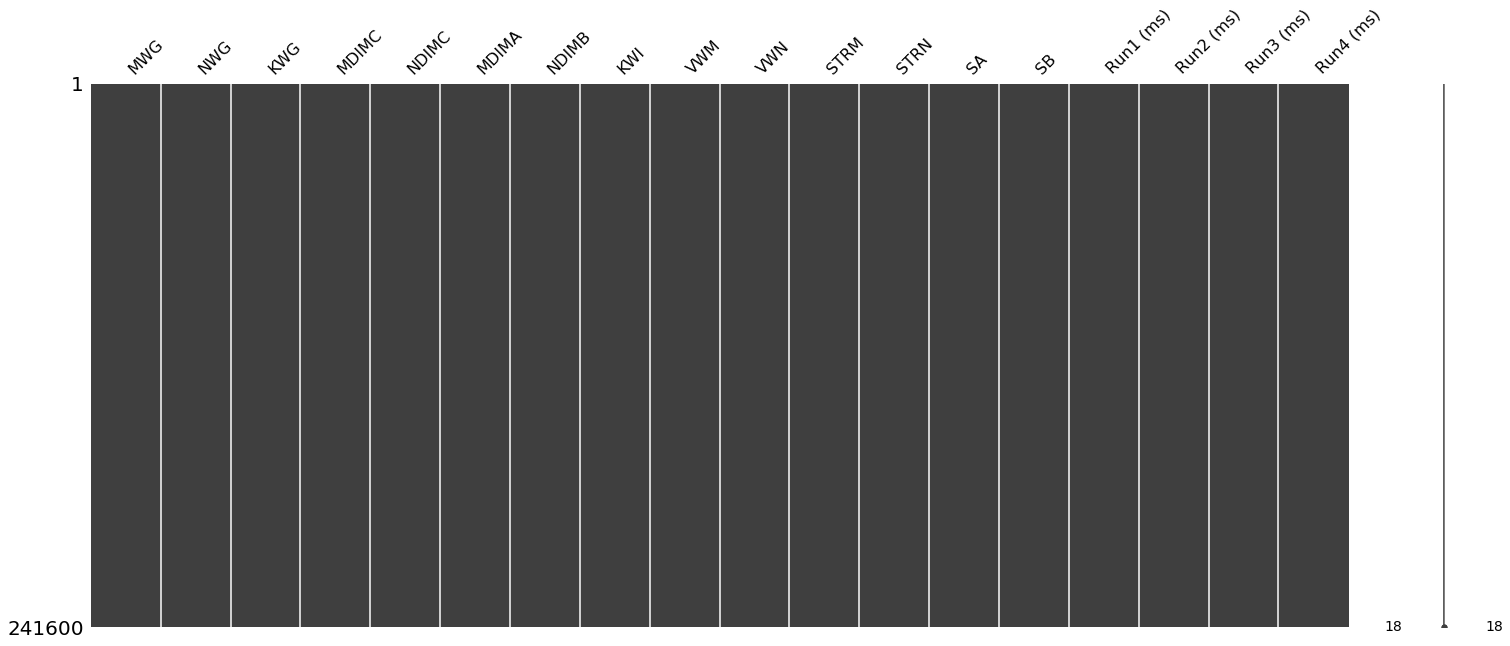

In [10]:
msno.matrix(df)

In [12]:
df.isnull().any().any()

False

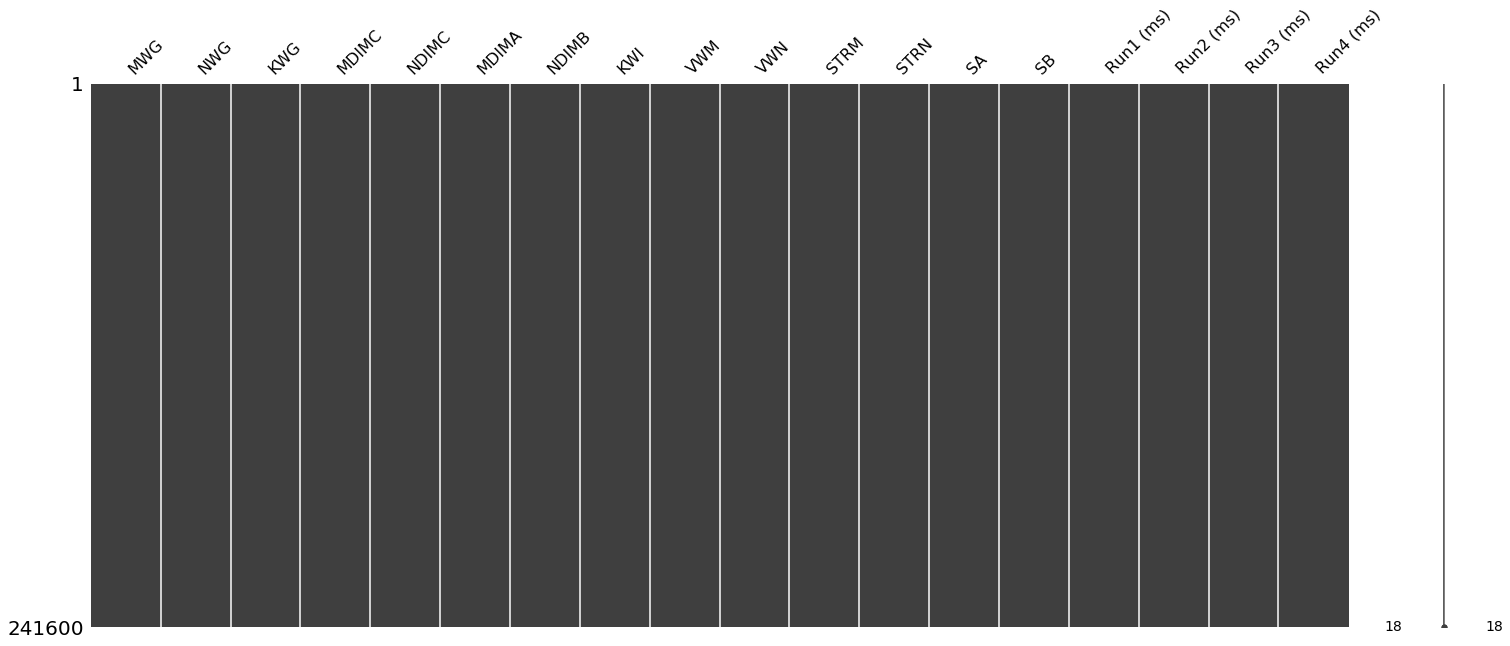

In [13]:
msno.matrix(df)

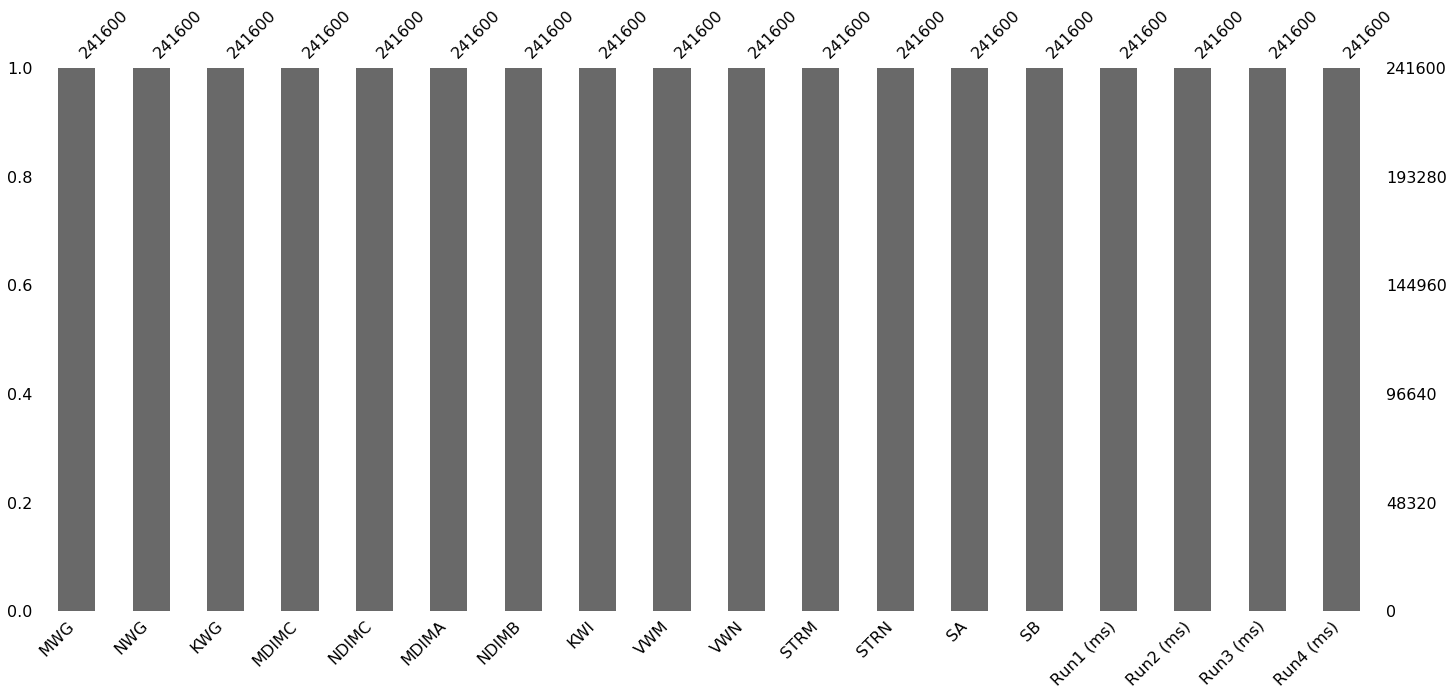

In [14]:
msno.bar(df)

In [15]:
df.columns[df.isnull().any()].tolist()

[]

In [16]:
df.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000


In [17]:
df.loc[[0]]

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.8


In [18]:
df.loc[30:33]

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
30,16,16,16,8,8,8,8,2,1,2,1,1,1,0,73.58,73.33,74.58,74.82
31,16,16,16,8,8,8,8,2,1,2,1,1,1,1,75.30,74.06,76.74,77.70
32,16,16,16,8,8,8,8,2,2,1,0,0,0,0,72.45,72.58,73.35,76.92
33,16,16,16,8,8,8,8,2,2,1,0,0,0,1,69.36,69.24,70.55,75.21


In [19]:
df.drop([0,24,51], axis=0).head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81
5,16,16,16,8,8,8,8,2,1,1,0,1,0,1,81.10,82.41,87.01,82.14


In [20]:
df.drop(df.index[1:5], axis=0).head(10)

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
5,16,16,16,8,8,8,8,2,1,1,0,1,0,1,81.10,82.41,87.01,82.14
6,16,16,16,8,8,8,8,2,1,1,0,1,1,0,83.31,82.86,88.60,82.97
7,16,16,16,8,8,8,8,2,1,1,0,1,1,1,93.13,94.30,96.19,94.43
8,16,16,16,8,8,8,8,2,1,1,1,0,0,0,117.38,116.95,124.15,117.83
9,16,16,16,8,8,8,8,2,1,1,1,0,0,1,85.76,85.30,86.96,87.19
10,16,16,16,8,8,8,8,2,1,1,1,0,1,0,83.48,83.46,84.44,84.38
11,16,16,16,8,8,8,8,2,1,1,1,0,1,1,87.08,85.97,87.09,87.23
12,16,16,16,8,8,8,8,2,1,1,1,1,0,0,118.71,117.23,118.61,118.55
13,16,16,16,8,8,8,8,2,1,1,1,1,0,1,91.28,92.42,92.42,93.40


In [21]:
df[100:].head() #df.tail(-100) )

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
100,16,16,16,8,8,8,8,8,2,1,0,1,0,0,71.44,71.83,71.50,72.01
101,16,16,16,8,8,8,8,8,2,1,0,1,0,1,72.57,73.83,73.10,73.68
102,16,16,16,8,8,8,8,8,2,1,0,1,1,0,61.74,63.56,62.75,63.85
103,16,16,16,8,8,8,8,8,2,1,0,1,1,1,73.26,75.15,74.37,72.73
104,16,16,16,8,8,8,8,8,2,1,1,0,0,0,71.72,71.71,71.88,71.85


In [23]:
df.VWM.values

array([1, 1, 1, ..., 4, 4, 4])

In [24]:
df['VWM'].values

array([1, 1, 1, ..., 4, 4, 4])

In [25]:
df.VWM.unique()

array([1, 2, 4, 8])

In [26]:
df.VWM.value_counts()

1    99808
2    75584
4    47264
8    18944
Name: VWM, dtype: int64

In [27]:
df.agg(['count', 'size', 'nunique'])

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600
size,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600
nunique,4,4,2,3,3,3,3,2,4,4,2,2,2,2,58161,58269,58264,58154


In [28]:
df.groupby('VWM').agg(['count', 'size', 'nunique']).stack()

MWG    NWG    KWG  ...  Run2 (ms)  Run3 (ms)  Run4 (ms)
VWM                               ...                                 
1   count    99808  99808  99808  ...      99808      99808      99808
    size     99808  99808  99808  ...      99808      99808      99808
    nunique      4      4      2  ...      30703      30693      30664
2   count    75584  75584  75584  ...      75584      75584      75584
    size     75584  75584  75584  ...      75584      75584      75584
    nunique      4      4      2  ...      28188      28300      28290
4   count    47264  47264  47264  ...      47264      47264      47264
    size     47264  47264  47264  ...      47264      47264      47264
    nunique      3      4      2  ...      25185      25084      25111
8   count    18944  18944  18944  ...      18944      18944      18944
    size     18944  18944  18944  ...      18944      18944      18944
    nunique      2      4      2  ...      14625      14618      14597

[12 rows x 17 columns]

In [29]:
df.groupby('VWM').agg(['count', 'size', 'nunique'])

MWG                   NWG         ... Run3 (ms)         Run4 (ms)               
     count   size nunique  count   size  ...      size nunique     count   size nunique
VWM                                      ...                                           
1    99808  99808       4  99808  99808  ...     99808   30693     99808  99808   30664
2    75584  75584       4  75584  75584  ...     75584   28300     75584  75584   28290
4    47264  47264       3  47264  47264  ...     47264   25084     47264  47264   25111
8    18944  18944       2  18944  18944  ...     18944   14618     18944  18944   14597

[4 rows x 51 columns]

In [30]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
106120,64,64,32,16,16,8,32,8,4,1,1,0,0,0,44.31,44.38,44.58,44.34
128737,64,128,32,8,16,32,8,2,1,4,0,0,0,1,214.06,213.64,214.41,214.47
123689,64,128,32,8,8,8,16,2,2,4,1,0,0,1,939.56,926.92,930.16,933.80
208174,128,128,16,8,32,16,16,2,2,2,1,1,1,0,256.62,262.30,261.88,261.55
239379,128,128,32,32,8,32,16,2,2,2,0,0,1,1,178.68,177.72,178.73,178.80


In [31]:
df.shape

(241600, 18)

In [32]:
df_sample.shape

(12080, 18)

In [33]:
df_dropped = df.dropna(subset=['KWI'])
df_dropped.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [34]:
df_dropped.shape

(241600, 18)

In [35]:
df_copy = df.copy()
df_copy.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [36]:
df_copy.shape

(241600, 18)

In [37]:
df_dropped['NDIMC'].dtype

dtype('int64')

In [38]:
df_dropped['NDIMC'].mean()

13.9358940397351

In [0]:
df_copy['NDIMC'].fillna(value=np.round(df['NDIMC'].mean(),decimals=0), inplace=True)

In [41]:
df_copy.agg(['count', 'size', 'nunique'])

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600
size,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600,241600
nunique,4,4,2,3,3,3,3,2,4,4,2,2,2,2,58161,58269,58264,58154


In [42]:
list(df['STRM'].unique())

[0, 1]

In [0]:
df['STRM'].replace({4:"agrícolas", 
                       5:"animales"
                       }, inplace=True)

In [44]:
list(df['STRM'].unique())

[0, 1]

In [47]:
df_copy['STRM'].mean()

0.5

In [49]:
df_copy['STRM'][df_copy['MDIMC'] == 6]

Series([], Name: STRM, dtype: int64)

In [51]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
106120,64,64,32,16,16,8,32,8,4,1,1,0,0,0,44.31,44.38,44.58,44.34
128737,64,128,32,8,16,32,8,2,1,4,0,0,0,1,214.06,213.64,214.41,214.47
123689,64,128,32,8,8,8,16,2,2,4,1,0,0,1,939.56,926.92,930.16,933.80
208174,128,128,16,8,32,16,16,2,2,2,1,1,1,0,256.62,262.30,261.88,261.55
239379,128,128,32,32,8,32,16,2,2,2,0,0,1,1,178.68,177.72,178.73,178.80


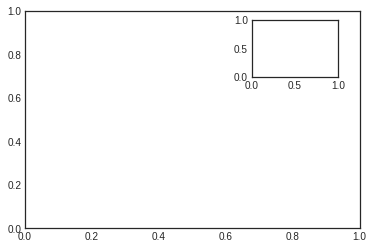

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

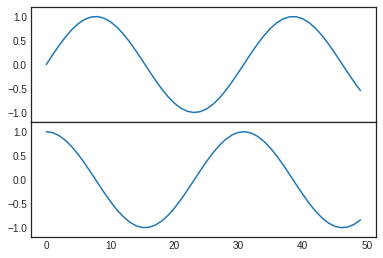

In [53]:
#The equivalent of this command within the object-oriented interface is fig.add_axes()

fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

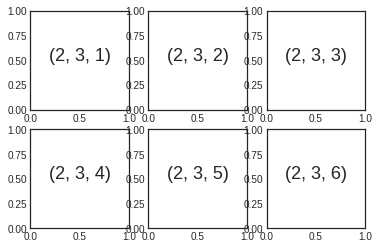

In [54]:
# The lowest level of these is plt.subplot(), which creates a single subplot within a grid
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

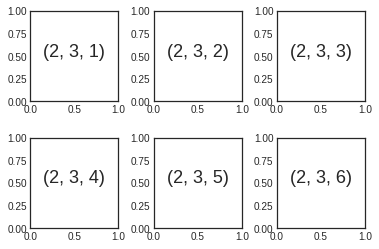

In [55]:
# plt.subplots_adjust can be used to adjust the spacing between these plots
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

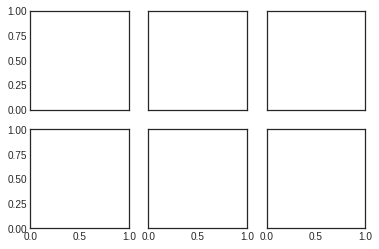

In [56]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

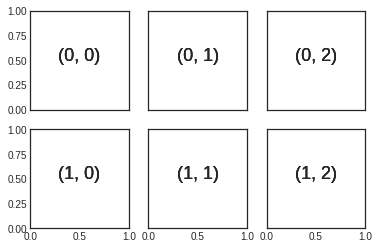

In [59]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

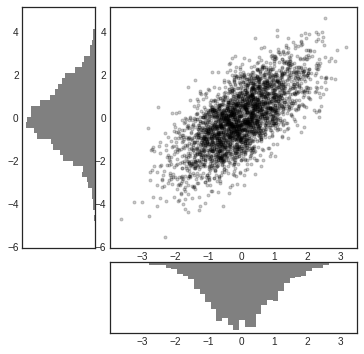

In [60]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

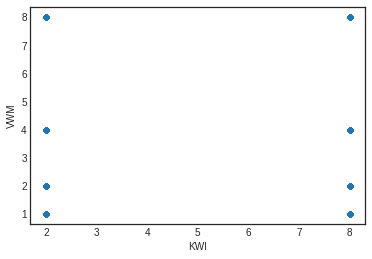

In [61]:
#figure.savefig('.../.jpeg')
#df_sample['KWI'] = dropna()
df_sample['KWI'] = df_sample['KWI'].astype('int64')

df_sample.plot(kind='scatter',x='KWI',y='VWM')

Text(0.5, 1.0, 'Frequency of KWI')

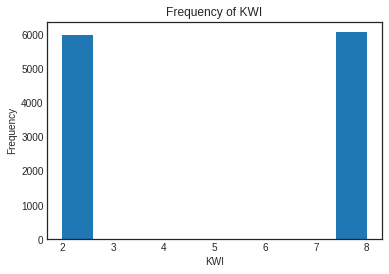

In [62]:
plt.hist(df_sample['KWI'])
plt.xlabel('KWI')
plt.ylabel('Frequency')
plt.title('Frequency of KWI')

Text(0.5, 1.0, 'Box Plot of KWI count')

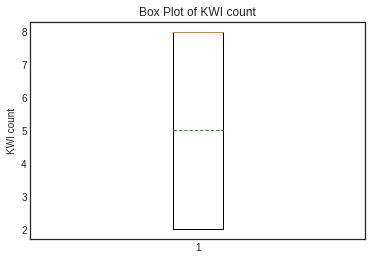

In [63]:
#plt.boxplot(df_sample['KWI'])
plt.boxplot(df_sample['KWI'], showmeans=True, meanline=True)
plt.ylabel('KWI count')
plt.title('Box Plot of KWI count')